In [2]:
import pandas as pd
df = pd.read_csv("anilist_anime_2016_2025.csv")


In [3]:
# 1. 计算每列缺失值的数量
missing_counts = df.isnull().sum()
print("=== 每列缺失值数量 ===")
print(missing_counts)

# 2. 计算每列缺失值的占比（百分比），更直观
missing_percent = (df.isnull().sum() / len(df)) * 100
# 保留2位小数，方便阅读
missing_percent = missing_percent.round(2)
print("\n=== 每列缺失值占比（%） ===")
print(missing_percent)

# 3. 只筛选出有缺失值的列（重点关注）
missing_cols = missing_counts[missing_counts > 0]
if len(missing_cols) > 0:
    print("\n=== 存在缺失值的列及缺失数量 ===")
    print(missing_cols)
else:
    print("\n✅ 所有列均无缺失值")

=== 每列缺失值数量 ===
id                       0
idMal                  108
title_romaji             0
title_english         1420
title_native             7
season                   0
seasonYear               0
startDate                0
endDate                  0
episodes                84
duration                27
format                   0
status                   0
source                  34
averageScore           539
meanScore                5
popularity               0
favourites               0
trending                 0
genres                  86
tags                   307
mainStudio             288
rankings_json            0
externalLinks_json       0
dtype: int64

=== 每列缺失值占比（%） ===
id                     0.00
idMal                  2.47
title_romaji           0.00
title_english         32.46
title_native           0.16
season                 0.00
seasonYear             0.00
startDate              0.00
endDate                0.00
episodes               1.92
duration               

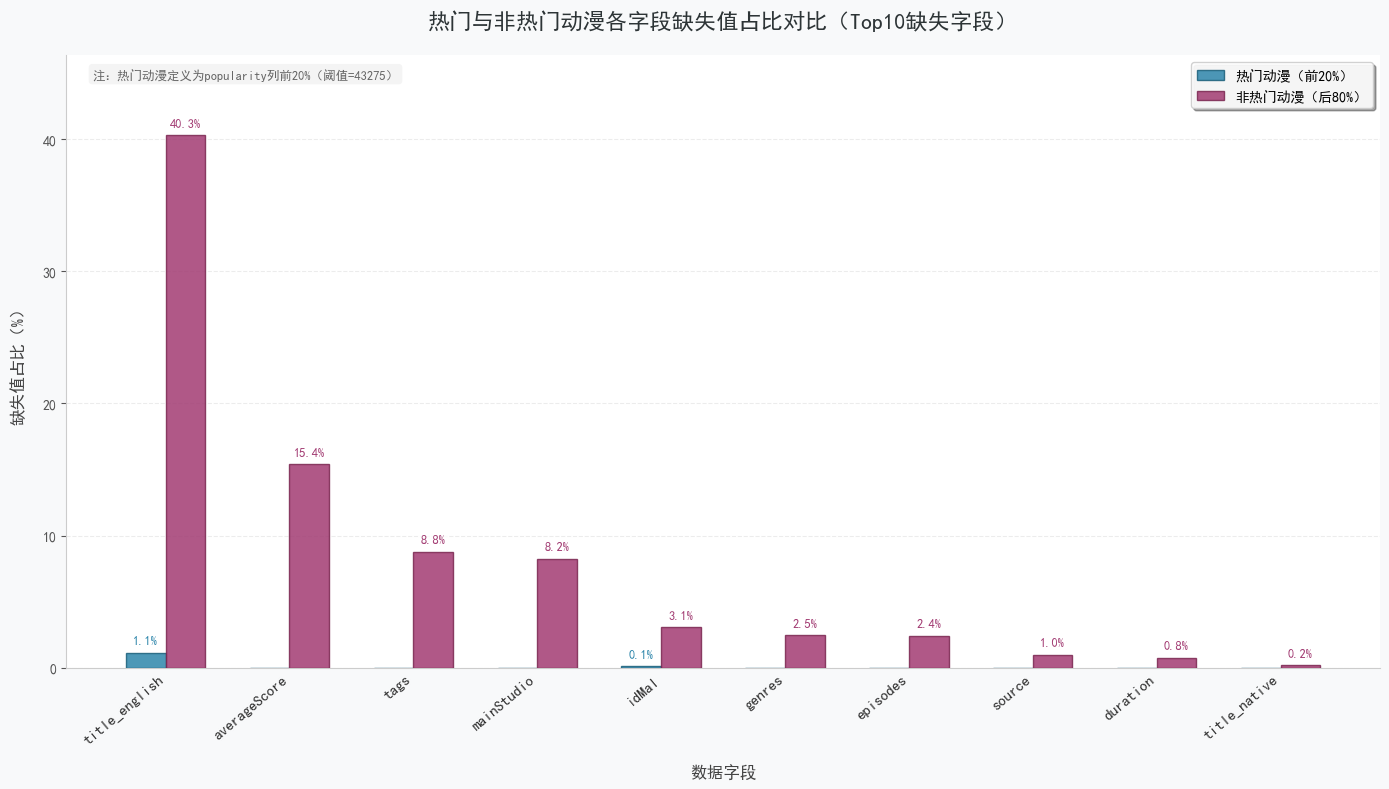


=== 热门/非热门动漫缺失值占比对比表（Top10字段） ===


In [2]:
# ========== 优化版：缺失值与热门动漫关联分析（高级可视化） ==========
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager
import matplotlib.patches as mpatches

# 设置全局字体（解决中文显示，可选专业字体）
try:
    # 优先使用系统中的思源黑体（无衬线，更现代）
    font_manager.fontManager.addfont('SimHei.ttf')  # 若有思源黑体可替换为SourceHanSansCN-Normal.otf
    plt.rcParams['font.sans-serif'] = ['Source Han Sans CN', 'SimHei']
except:
    plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.facecolor'] = '#f8f9fa'  # 图表背景色（浅灰，更高级）

# 1. 加载数据并定义热门动漫
df = pd.read_csv("anilist_anime_2016_2025.csv")
popularity_threshold = df["popularity"].quantile(0.8)
df["is_popular"] = df["popularity"] >= popularity_threshold

# 2. 分层计算缺失值
popular_df = df[df["is_popular"] == True]
non_popular_df = df[df["is_popular"] == False]

popular_missing_percent = (popular_df.isnull().sum() / len(popular_df)) * 100
non_popular_missing_percent = (non_popular_df.isnull().sum() / len(non_popular_df)) * 100

# 3. 筛选有缺失值的列并取前10（按整体缺失率排序）
missing_cols = df.isnull().sum()[df.isnull().sum() > 0].index
overall_missing = (df.isnull().sum() / len(df)) * 100
top10_cols = overall_missing[missing_cols].sort_values(ascending=False).head(10).index

# 4. 准备可视化数据
x = np.arange(len(top10_cols))
width = 0.32  # 柱子宽度（更紧凑）
colors = ["#2E86AB", "#A23B72"]  # 高级配色（深蓝紫+玫红，避免默认颜色）

# 5. 创建画布（设置合适尺寸和分辨率）
fig, ax = plt.subplots(figsize=(14, 8), dpi=100)

# 绘制柱状图（添加渐变和边框增强质感）
bar1 = ax.bar(
    x - width/2, 
    popular_missing_percent[top10_cols], 
    width, 
    label="热门动漫（前20%）", 
    color=colors[0], 
    alpha=0.85,
    edgecolor="#1A5F7A",  # 边框色（加深主色）
    linewidth=1,
    zorder=3  # 层级（高于网格）
)
bar2 = ax.bar(
    x + width/2, 
    non_popular_missing_percent[top10_cols], 
    width, 
    label="非热门动漫（后80%）", 
    color=colors[1], 
    alpha=0.85,
    edgecolor="#7A2650",
    linewidth=1,
    zorder=3
)

# 6. 优化坐标轴和网格
ax.set_ylim(0, max(popular_missing_percent[top10_cols].max(), non_popular_missing_percent[top10_cols].max()) * 1.15)
ax.spines["top"].set_visible(False)  # 隐藏顶部边框
ax.spines["right"].set_visible(False)  # 隐藏右侧边框
ax.spines["left"].set_color("#cccccc")  # 左侧边框浅灰色
ax.spines["bottom"].set_color("#cccccc")  # 底部边框浅灰色

# 添加网格（仅横向，更简洁）
ax.grid(axis="y", color="#e0e0e0", linestyle="--", alpha=0.6, zorder=0)
ax.set_axisbelow(True)  # 网格在柱子下方

# 7. 优化刻度和标签
ax.set_xticks(x)
ax.set_xticklabels(
    top10_cols, 
    rotation=40, 
    ha="right", 
    fontsize=11, 
    color="#333333"
)
ax.tick_params(axis="y", labelsize=10, colors="#555555")
ax.tick_params(axis="x", length=0)  # 隐藏x轴刻度线

# 8. 添加数值标签（带背景框，更清晰）
for bar in bar1:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width()/2, 
            height + 0.5, 
            f"{height:.1f}%", 
            ha="center", 
            va="bottom", 
            fontsize=9,
            color=colors[0],
            fontweight="bold",
            bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8, edgecolor="none")
        )
for bar in bar2:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width()/2, 
            height + 0.5, 
            f"{height:.1f}%", 
            ha="center", 
            va="bottom", 
            fontsize=9,
            color=colors[1],
            fontweight="bold",
            bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8, edgecolor="none")
        )

# 9. 添加标题和轴标签
ax.set_title(
    "热门与非热门动漫各字段缺失值占比对比（Top10缺失字段）", 
    fontsize=16, 
    fontweight="bold", 
    pad=20,
    color="#2d3436"
)
ax.set_xlabel(
    "数据字段", 
    fontsize=12, 
    labelpad=12, 
    color="#444444"
)
ax.set_ylabel(
    "缺失值占比（%）", 
    fontsize=12, 
    labelpad=12, 
    color="#444444"
)

# 10. 优化图例（更精致）
legend = ax.legend(
    loc="upper right",
    frameon=True,
    fancybox=True,
    shadow=True,
    framealpha=0.9,
    fontsize=10,
    labels=["热门动漫（前20%）", "非热门动漫（后80%）"]
)
legend.get_frame().set_facecolor("white")

# 11. 添加注释（说明热门定义）
ax.text(
    0.02, 0.98, 
    f"注：热门动漫定义为popularity列前20%（阈值={popularity_threshold:.0f}）", 
    transform=ax.transAxes, 
    fontsize=9, 
    color="#666666",
    va="top",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="#f0f0f0", alpha=0.7, edgecolor="none")
)

# 调整布局并保存（可选，保存为高清图片）
plt.tight_layout()
plt.savefig("missing_value_popular_comparison.png", dpi=300, bbox_inches="tight", facecolor="#f8f9fa")
plt.show()

# ========== 输出数值对比表（带格式美化） ==========
comparison_df = pd.DataFrame({
    "热门动漫缺失占比(%)": popular_missing_percent[top10_cols].round(2),
    "非热门动漫缺失占比(%)": non_popular_missing_percent[top10_cols].round(2),
    "差异(%)": (popular_missing_percent[top10_cols] - non_popular_missing_percent[top10_cols]).round(2)
})
comparison_df.index.name = "字段名"
print("\n=== 热门/非热门动漫缺失值占比对比表（Top10字段） ===")
print(comparison_df.style.background_gradient(cmap="RdBu_r", subset=["差异(%)"]))